# Data Prep

In [151]:
import pandas as pd

In [2]:
df = pd.read_csv('amazon-purchases.csv')

In [6]:
survey = pd.read_csv('survey.csv')

,Survey ResponseID,Q-demos-age,Q-demos-hispanic,Q-demos-race,Q-demos-education,Q-demos-income,Q-demos-gender,Q-sexual-orientation,Q-demos-state,Q-amazon-use-howmany,...,Q-substance-use-marijuana,Q-substance-use-alcohol,Q-personal-diabetes,Q-personal-wheelchair,Q-life-changes,Q-sell-YOUR-data,Q-sell-consumer-data,Q-small-biz-use,Q-census-use,Q-research-society
0,R_1ou69fj4DQGsVcp,35 - 44 years,No,Black or African American,High school diploma or GED,"$25,000 - $49,999",Female,heterosexual (straight),Iowa,2,...,No,Yes,No,No,Lost a job,No,No,No,No,No
1,R_2UbJL30HRjK1sdD,45 - 54 years,No,White or Caucasian,High school diploma or GED,"$100,000 - $149,999",Male,heterosexual (straight),Ohio,2,...,No,No,No,No,NaN,No,No,No,No,Yes
2,R_UPXamGKtmf4RVIZ,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$25,000 - $49,999",Male,heterosexual (straight),Arkansas,1 (just me!),...,No,No,Yes,No,NaN,No,No,No,No,Yes
3,R_2dYk5auG9Fv5Qve,35 - 44 years,Yes,White or Caucasian,"Graduate or professional degree (MA, MS, MBA, ...","$50,000 - $74,999",Male,heterosexual (straight),Tennessee,1 (just me!),...,No,No,No,No,NaN,No,No,No,No,No
4,R_2aP0GyIR66gSTiR,25 - 34 years,No,White or Caucasian,High school diploma or GED,"$50,000 - $74,999",Male,heterosexual (straight),Virginia,2,...,No,Yes,No,No,NaN,No,Yes if consumers get part of the profit,I don't know,No,No


In [ ]:
merged = df.merge(survey, on='Survey ResponseID', how='inner')

In [8]:
merged = merged.drop_duplicates()
merged.to_csv('merged.csv')

In [3]:
merged = pd.read_csv('merged.csv')
merged = merged[(merged['Q-amazon-use-hh-size'] == '1 (just me!)') | (merged['Q-amazon-use-howmany'] == '1 (just me!)')]

In [19]:
unique_categories_df.to_csv('categories.csv',index=False)

In [16]:
df = merged[['Order Date','Purchase Price Per Unit','Quantity','Title','Category','Survey ResponseID','Q-demos-age']]

In [17]:
df['Total Purchase Price'] = df['Purchase Price Per Unit'] * df['Quantity']

/var/folders/lm/ltt61ln55pdb08_0zxtv_ym40000gn/T/ipykernel_89201/1633931110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total Purchase Price'] = df['Purchase Price Per Unit'] * df['Quantity']


In [24]:
df['Q-demos-income'] = merged['Q-demos-income']

/var/folders/lm/ltt61ln55pdb08_0zxtv_ym40000gn/T/ipykernel_89201/2859435395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Q-demos-income'] = merged['Q-demos-income']


In [22]:
df = df[df['Title'].notna()]

In [25]:
df.head()

,Order Date,Purchase Price Per Unit,Quantity,Title,Category,Survey ResponseID,Q-demos-age,Total Purchase Price,Q-demos-income
0,2018-12-04,7.98,1.0,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,FLASH_MEMORY,R_01vNIayewjIIKMF,35 - 44 years,7.98,"$25,000 - $49,999"
1,2018-12-22,13.99,1.0,Betron BS10 Earphones Wired Headphones in Ear ...,HEADPHONES,R_01vNIayewjIIKMF,35 - 44 years,13.99,"$25,000 - $49,999"
3,2018-12-25,10.45,1.0,Perfecto Stainless Steel Shaving Bowl. Durable...,DISHWARE_BOWL,R_01vNIayewjIIKMF,35 - 44 years,10.45,"$25,000 - $49,999"
4,2018-12-25,10.00,1.0,Proraso Shaving Cream for Men,SHAVING_AGENT,R_01vNIayewjIIKMF,35 - 44 years,10.00,"$25,000 - $49,999"
5,2019-02-18,10.99,1.0,Micro USB Cable Android Charger - Syncwire [2-...,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,35 - 44 years,10.99,"$25,000 - $49,999"


In [38]:
categories = pd.DataFrame(df['Category'].unique())

In [39]:
categories.to_csv('categories.csv')

## I asked DeepSeek to assign the groups at this step

In [58]:
c = pd.read_csv('New_category.csv') 
c.head(10)

,Category,New_Category
0,FLASH_MEMORY,Electronics
1,HEADPHONES,Electronics
2,DISHWARE_BOWL,Home and Kitchen
3,SHAVING_AGENT,Beauty and Personal Care
4,COMPUTER_PROCESSOR,Electronics
5,COMPUTER_ADD_ON,Electronics
6,AMAZON_TABLET,Electronics
7,APPAREL_BELT,"Clothing, Shoes, and Jewelry"
8,PORTABLE_ELECTRONIC_DEVICE_STAND,Electronics
9,IMMERSION_HEATER,Home and Kitchen


In [59]:
c['New_Category'].unique()

array(['Electronics', 'Home and Kitchen', 'Beauty and Personal Care',
       'Clothing, Shoes, and Jewelry', 'Food', 'Office Product',
       'Pet Supplies', 'Books', 'Toys and Games', 'Sports and Outdoors',
       nan], dtype=object)

# Check income/age group

In [26]:
df['Q-demos-income'].unique()

array(['$25,000 - $49,999', '$50,000 - $74,999', '$75,000 - $99,999',
       '$100,000 - $149,999', 'Less than $25,000', '$150,000 or more',
       'Prefer not to say'], dtype=object)

In [30]:
df = df[~df['Q-demos-income'].isin(['Prefer not to say'])]

In [31]:
df['Q-demos-age'].unique()

array(['35 - 44 years', '55 - 64 years', '25 - 34 years', '65 and older',
       '45 - 54 years', '18 - 24 years'], dtype=object)

In [61]:
merged_df = pd.merge(df, c, how='left', left_on='Category', right_on='Category')

In [66]:
merged_df.to_csv('Cleaned_data.csv')

In [152]:
data = pd.read_csv('Cleaned_data.csv')
data.head()

,Unnamed: 0,Order Date,Purchase Price Per Unit,Quantity,Title,Category,Survey ResponseID,Q-demos-age,Total Purchase Price,Q-demos-income,New_Category
0,0,2018-12-04,7.98,1.0,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,FLASH_MEMORY,R_01vNIayewjIIKMF,35 - 44 years,7.98,"$25,000 - $49,999",Electronics
1,1,2018-12-22,13.99,1.0,Betron BS10 Earphones Wired Headphones in Ear ...,HEADPHONES,R_01vNIayewjIIKMF,35 - 44 years,13.99,"$25,000 - $49,999",Electronics
2,2,2018-12-25,10.45,1.0,Perfecto Stainless Steel Shaving Bowl. Durable...,DISHWARE_BOWL,R_01vNIayewjIIKMF,35 - 44 years,10.45,"$25,000 - $49,999",Home and Kitchen
3,3,2018-12-25,10.00,1.0,Proraso Shaving Cream for Men,SHAVING_AGENT,R_01vNIayewjIIKMF,35 - 44 years,10.00,"$25,000 - $49,999",Beauty and Personal Care
4,4,2019-02-18,10.99,1.0,Micro USB Cable Android Charger - Syncwire [2-...,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,35 - 44 years,10.99,"$25,000 - $49,999",Electronics


# Category

In [99]:
# by income groups
income_group_stats = data.groupby('Q-demos-age')['Total Purchase Price'].agg(['sum', 'count', 'mean'])
income_group_stats

,sum,count,mean
Q-demos-age,,,
18 - 24 years,2110847.57,90501,23.324025
25 - 34 years,8051336.78,337214,23.876045
35 - 44 years,6658796.56,286838,23.214485
45 - 54 years,3571736.01,162779,21.942241
55 - 64 years,2010119.13,82997,24.219178
65 and older,1004396.93,41043,24.471821


## Per capita 

In [154]:
total_spent_by_group_category = data.groupby(['Q-demos-income', 'New_Category'])['Total Purchase Price'].sum().reset_index()
group_size = data.groupby('Q-demos-income')['Survey ResponseID'].nunique().reset_index()
group_size.columns = ['Q-demos-income', 'Group Size']
merged_data = pd.merge(total_spent_by_group_category, group_size, on='Q-demos-income')
merged_data['Per Capita Spending'] = merged_data['Total Purchase Price'] / merged_data['Group Size']

In [137]:
merged_data.head()

,Q-demos-income,New_Category,Total Purchase Price,Group Size,Per Capita Spending
0,"$100,000 - $149,999",Beauty and Personal Care,460807.31,496,929.046996
1,"$100,000 - $149,999",Books,126775.19,496,255.595141
2,"$100,000 - $149,999","Clothing, Shoes, and Jewelry",511051.73,496,1030.346230
3,"$100,000 - $149,999",Electronics,1117650.41,496,2253.327440
4,"$100,000 - $149,999",Food,255659.48,496,515.442500


# What do higher income groups buy?

In [138]:
# income and category
category_income_stats = merged_data.groupby(['Q-demos-income','New_Category'])['Per Capita Spending'].agg(['sum'])
category_income_stats = category_income_stats.reset_index()

In [173]:
# high income '$150,000 or more'
high = category_income_stats[category_income_stats['Q-demos-income']=='$150,000 or more'].sort_values(by='sum')
high

,Q-demos-income,New_Category,sum
16,"$150,000 or more",Office Product,160.517407
19,"$150,000 or more",Toys and Games,276.846074
18,"$150,000 or more",Sports and Outdoors,329.487037
11,"$150,000 or more",Books,330.339741
17,"$150,000 or more",Pet Supplies,333.642370
14,"$150,000 or more",Food,699.965037
12,"$150,000 or more","Clothing, Shoes, and Jewelry",1052.357185
10,"$150,000 or more",Beauty and Personal Care,1137.637704
13,"$150,000 or more",Electronics,2441.407556
15,"$150,000 or more",Home and Kitchen,3350.131296


In [181]:
# high income '$150,000 or more'
category_income_stats[category_income_stats['Q-demos-income']=='$150,000 or more'].to_clipboard(index=False)

# What do lower income groups buy?

In [184]:
# 'Less than $25,000'
low = category_income_stats[category_income_stats['Q-demos-income']=='Less than $25,000'].sort_values(by='sum')
low

,Q-demos-income,New_Category,sum
56,"Less than $25,000",Office Product,80.127354
58,"Less than $25,000",Sports and Outdoors,80.411289
59,"Less than $25,000",Toys and Games,104.697251
51,"Less than $25,000",Books,192.132045
57,"Less than $25,000",Pet Supplies,197.039296
54,"Less than $25,000",Food,383.302216
52,"Less than $25,000","Clothing, Shoes, and Jewelry",527.565997
50,"Less than $25,000",Beauty and Personal Care,537.084536
55,"Less than $25,000",Home and Kitchen,1269.782354
53,"Less than $25,000",Electronics,1269.965395


In [185]:
together = category_income_stats
together

,Q-demos-income,New_Category,sum
0,"$100,000 - $149,999",Beauty and Personal Care,929.046996
1,"$100,000 - $149,999",Books,255.595141
2,"$100,000 - $149,999","Clothing, Shoes, and Jewelry",1030.346230
3,"$100,000 - $149,999",Electronics,2253.327440
4,"$100,000 - $149,999",Food,515.442500
5,"$100,000 - $149,999",Home and Kitchen,2718.271754
6,"$100,000 - $149,999",Office Product,168.530323
7,"$100,000 - $149,999",Pet Supplies,318.277621
8,"$100,000 - $149,999",Sports and Outdoors,223.675645
9,"$100,000 - $149,999",Toys and Games,232.484234


In [190]:
wide_df = together.pivot(index='Q-demos-income', columns='New_Category', values='sum')
wide_df.to_clipboard()

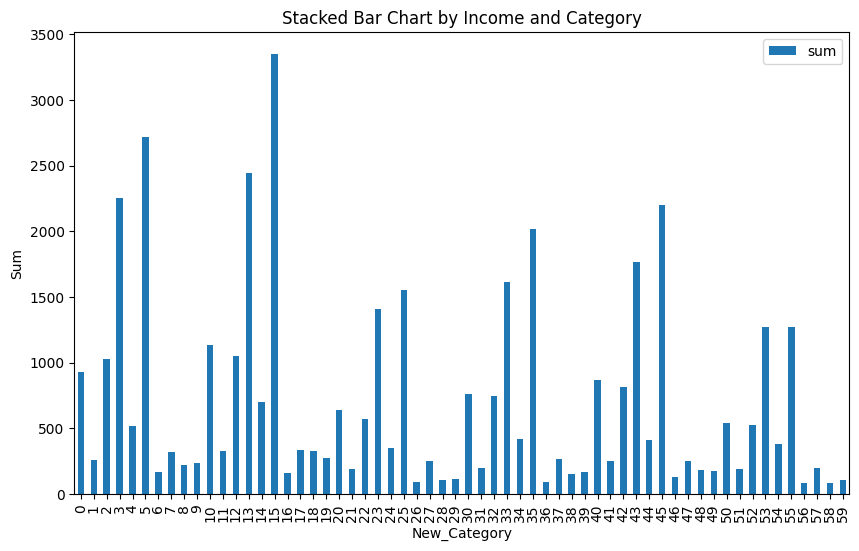

In [187]:
import matplotlib.pyplot as plt

together.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('New_Category')
plt.ylabel('Sum')
plt.title('Stacked Bar Chart by Income and Category')
plt.show()

# Age differences

In [143]:
total_spent_by_age_category = data.groupby(['Q-demos-age', 'New_Category'])['Total Purchase Price'].sum().reset_index()
group_size = data.groupby('Q-demos-age')['Survey ResponseID'].nunique().reset_index()
group_size.columns = ['Q-demos-age', 'Group Size']
merged_data2 = pd.merge(total_spent_by_age_category, group_size, on='Q-demos-age')
merged_data2['Per Capita Spending'] = merged_data['Total Purchase Price'] / merged_data2['Group Size']

In [144]:
merged_data2.head()

,Q-demos-age,New_Category,Total Purchase Price,Group Size,Per Capita Spending
0,18 - 24 years,Beauty and Personal Care,249043.68,568,438.457183
1,18 - 24 years,Books,109514.29,568,192.806849
2,18 - 24 years,"Clothing, Shoes, and Jewelry",259805.79,568,457.404560
3,18 - 24 years,Electronics,645573.62,568,1136.573275
4,18 - 24 years,Food,101545.84,568,178.777887


In [146]:
category_age_stats = merged_data2.groupby(['Q-demos-age','New_Category'])['Per Capita Spending'].agg(['sum'])
category_age_stats = category_age_stats.reset_index()

In [147]:
category_age_stats

,Q-demos-age,New_Category,sum
0,18 - 24 years,Beauty and Personal Care,438.457183
1,18 - 24 years,Books,192.806849
2,18 - 24 years,"Clothing, Shoes, and Jewelry",457.404560
3,18 - 24 years,Electronics,1136.573275
4,18 - 24 years,Food,178.777887
5,18 - 24 years,Home and Kitchen,979.117993
6,18 - 24 years,Office Product,59.438327
7,18 - 24 years,Pet Supplies,104.132201
8,18 - 24 years,Sports and Outdoors,89.705423
9,18 - 24 years,Toys and Games,79.494472


In [149]:
# 18 - 24 years	
category_age_stats[category_age_stats['Q-demos-age']=='18 - 24 years'].sort_values(by='sum')

,Q-demos-age,New_Category,sum
6,18 - 24 years,Office Product,59.438327
9,18 - 24 years,Toys and Games,79.494472
8,18 - 24 years,Sports and Outdoors,89.705423
7,18 - 24 years,Pet Supplies,104.132201
4,18 - 24 years,Food,178.777887
1,18 - 24 years,Books,192.806849
0,18 - 24 years,Beauty and Personal Care,438.457183
2,18 - 24 years,"Clothing, Shoes, and Jewelry",457.404560
5,18 - 24 years,Home and Kitchen,979.117993
3,18 - 24 years,Electronics,1136.573275


In [150]:
# old people
category_age_stats[category_age_stats['Q-demos-age']=='65 and older'].sort_values(by='sum')

,Q-demos-age,New_Category,sum
56,65 and older,Office Product,161.267899
59,65 and older,Toys and Games,161.741513
58,65 and older,Sports and Outdoors,190.951849
51,65 and older,Books,281.657815
57,65 and older,Pet Supplies,333.477311
54,65 and older,Food,589.533782
52,65 and older,"Clothing, Shoes, and Jewelry",674.654118
50,65 and older,Beauty and Personal Care,996.380000
53,65 and older,Electronics,1981.762269
55,65 and older,Home and Kitchen,2995.341849


# No. of purchases

In [153]:
data.head()

,Unnamed: 0,Order Date,Purchase Price Per Unit,Quantity,Title,Category,Survey ResponseID,Q-demos-age,Total Purchase Price,Q-demos-income,New_Category
0,0,2018-12-04,7.98,1.0,SanDisk Ultra 16GB Class 10 SDHC UHS-I Memory ...,FLASH_MEMORY,R_01vNIayewjIIKMF,35 - 44 years,7.98,"$25,000 - $49,999",Electronics
1,1,2018-12-22,13.99,1.0,Betron BS10 Earphones Wired Headphones in Ear ...,HEADPHONES,R_01vNIayewjIIKMF,35 - 44 years,13.99,"$25,000 - $49,999",Electronics
2,2,2018-12-25,10.45,1.0,Perfecto Stainless Steel Shaving Bowl. Durable...,DISHWARE_BOWL,R_01vNIayewjIIKMF,35 - 44 years,10.45,"$25,000 - $49,999",Home and Kitchen
3,3,2018-12-25,10.00,1.0,Proraso Shaving Cream for Men,SHAVING_AGENT,R_01vNIayewjIIKMF,35 - 44 years,10.00,"$25,000 - $49,999",Beauty and Personal Care
4,4,2019-02-18,10.99,1.0,Micro USB Cable Android Charger - Syncwire [2-...,COMPUTER_PROCESSOR,R_01vNIayewjIIKMF,35 - 44 years,10.99,"$25,000 - $49,999",Electronics


In [158]:
order_count_by_group_category = data.groupby(['Q-demos-income', 'New_Category'])['Survey ResponseID'].nunique().reset_index()
order_count_by_group_category.columns = ['Q-demos-income', 'New_Category', 'Order Count']
merged_data3 = pd.merge(merged_data, order_count_by_group_category, on=['Q-demos-income', 'New_Category'], how='left')
merged_data3['Order_per_person'] = merged_data3['Order Count']/merged_data3['Group Size']

In [159]:
merged_data3.head()

,Q-demos-income,New_Category,Total Purchase Price,Group Size,Per Capita Spending,Order Count,Order_per_person
0,"$100,000 - $149,999",Beauty and Personal Care,460807.31,496,929.046996,469,0.945565
1,"$100,000 - $149,999",Books,126775.19,496,255.595141,436,0.879032
2,"$100,000 - $149,999","Clothing, Shoes, and Jewelry",511051.73,496,1030.346230,468,0.943548
3,"$100,000 - $149,999",Electronics,1117650.41,496,2253.327440,487,0.981855
4,"$100,000 - $149,999",Food,255659.48,496,515.442500,392,0.790323


In [161]:
no_income_stats = merged_data3.groupby(['Q-demos-income','New_Category'])['Order_per_person'].agg(['sum'])
no_income_stats = no_income_stats.reset_index()
no_income_stats

,Q-demos-income,New_Category,sum
0,"$100,000 - $149,999",Beauty and Personal Care,0.945565
1,"$100,000 - $149,999",Books,0.879032
2,"$100,000 - $149,999","Clothing, Shoes, and Jewelry",0.943548
3,"$100,000 - $149,999",Electronics,0.981855
4,"$100,000 - $149,999",Food,0.790323
5,"$100,000 - $149,999",Home and Kitchen,0.975806
6,"$100,000 - $149,999",Office Product,0.780242
7,"$100,000 - $149,999",Pet Supplies,0.622984
8,"$100,000 - $149,999",Sports and Outdoors,0.780242
9,"$100,000 - $149,999",Toys and Games,0.737903


In [163]:
# high income $150,000 or more	
no_income_stats[no_income_stats['Q-demos-income']=='$150,000 or more'].sort_values(by='sum')

,Q-demos-income,New_Category,sum
17,"$150,000 or more",Pet Supplies,0.633333
19,"$150,000 or more",Toys and Games,0.774074
16,"$150,000 or more",Office Product,0.814815
18,"$150,000 or more",Sports and Outdoors,0.814815
11,"$150,000 or more",Books,0.866667
14,"$150,000 or more",Food,0.870370
10,"$150,000 or more",Beauty and Personal Care,0.962963
12,"$150,000 or more","Clothing, Shoes, and Jewelry",0.974074
13,"$150,000 or more",Electronics,0.985185
15,"$150,000 or more",Home and Kitchen,0.988889


In [171]:
no_income_stats[no_income_stats['Q-demos-income']=='$150,000 or more'].sort_values(by='sum').to_clipboard(index=False)

In [164]:
# low income Less than $25,000	
no_income_stats[no_income_stats['Q-demos-income']=='Less than $25,000'].sort_values(by='sum')

,Q-demos-income,New_Category,sum
57,"Less than $25,000",Pet Supplies,0.584192
59,"Less than $25,000",Toys and Games,0.589347
58,"Less than $25,000",Sports and Outdoors,0.627148
56,"Less than $25,000",Office Product,0.719931
54,"Less than $25,000",Food,0.740550
51,"Less than $25,000",Books,0.771478
50,"Less than $25,000",Beauty and Personal Care,0.922680
52,"Less than $25,000","Clothing, Shoes, and Jewelry",0.927835
55,"Less than $25,000",Home and Kitchen,0.977663
53,"Less than $25,000",Electronics,0.979381


In [170]:
no_income_stats[no_income_stats['Q-demos-income']=='Less than $25,000'].sort_values(by='sum').to_clipboard(index=False)

In [166]:
no_income_stats['Q-demos-income'].unique()

array(['$100,000 - $149,999', '$150,000 or more', '$25,000 - $49,999',
       '$50,000 - $74,999', '$75,000 - $99,999', 'Less than $25,000'],
      dtype=object)

In [167]:
no_income_stats[no_income_stats['Q-demos-income']=='$75,000 - $99,999'].sort_values(by='sum')

,Q-demos-income,New_Category,sum
47,"$75,000 - $99,999",Pet Supplies,0.616601
49,"$75,000 - $99,999",Toys and Games,0.707510
48,"$75,000 - $99,999",Sports and Outdoors,0.723320
46,"$75,000 - $99,999",Office Product,0.741107
44,"$75,000 - $99,999",Food,0.790514
41,"$75,000 - $99,999",Books,0.835968
40,"$75,000 - $99,999",Beauty and Personal Care,0.920949
42,"$75,000 - $99,999","Clothing, Shoes, and Jewelry",0.944664
45,"$75,000 - $99,999",Home and Kitchen,0.978261
43,"$75,000 - $99,999",Electronics,0.980237
